#### 나비스 공모전 
##### 지역별 의료수준 편차를 의료수가 조정으로 해결하고자 함
##### 지역별 의료 편차가 가장 심한 과 => 외과, 소아과, 산부인과 
- 산부인과는 사전에 의료수가 증대로 의사들의 기피과의 인식을 증대한 적이 있음
- 그러므로 나는 소아과로 접근
- 개폐업률, 의료인력, 응급실과의 반경 등을 주요한 변수로 잡고 접근 
- => 최종적으로 지역별 의료수가를 달리하면 증대효과가 있는가 ?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate 
import glob

- 함수생성

In [3]:
def process_and_visualize(file_path):
    # file
    data = pd.read_csv(file_path, encoding='utf-8')
    
    data.columns = data.iloc[0]  
    data = data.drop(0)  
    delet = ["계", "전문과목미표시전문의", "일반의"]
    data_cleaned = data[~data['표시과목별(1)'].isin(delet)]

    if '계' in data_cleaned.columns:
        data_cleaned = data_cleaned.drop(columns=['계'])

    regions = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
               '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

    for region in regions:
        region_columns = [col for col in data_cleaned.columns if region in col]
        data_cleaned[region] = data_cleaned[region_columns].apply(pd.to_numeric, errors='coerce').sum(axis=1)

    data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()].copy()
    final_df = data_cleaned[['표시과목별(1)'] + [region for region in regions]]

    final_df['MAX'] = final_df[[region for region in regions if region in final_df.columns]].idxmax(axis=1)
    final_df['MIN'] = final_df[[region for region in regions if region in final_df.columns]].idxmin(axis=1)
    
    print()
    return final_df

- 2019년 지역별 병원 data

In [4]:
hos2019 = process_and_visualize(r"C:\Hwan\NABIS\hospital\data\시도별_표시과목별_의원_현황_2019.csv")
child2019 = hos2019.iloc[[10]].reset_index(drop=True)
child2019

,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,소아청소년과,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도


- 2020년 지역별 병원 data

In [5]:
hos2020 = process_and_visualize(r"C:\Hwan\NABIS\hospital\data\시도별_표시과목별_의원_현황_2020.csv")
child2020 = hos2020.iloc[[10]].reset_index(drop=True)
child2020

,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,소아청소년과,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도


- 2021년 지역별 병원 data

In [6]:
hos2021 = process_and_visualize(r"C:\Hwan\NABIS\hospital\data\시도별_표시과목별_의원_현황_2021.csv")
child2021 = hos2021.iloc[[10]].reset_index(drop=True)
child2021

,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,소아청소년과,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도


- 2022년 지역별 병원 data

In [7]:
hos2022 = process_and_visualize(r"C:\Hwan\NABIS\hospital\data\시도별_표시과목별_의원_현황_2022.csv")
child2022 = hos2022.iloc[[10]].reset_index(drop=True)
child2022

,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,소아청소년과,7264,2160,1844,2236,652,932,512,10540,904,868,1044,1040,416,1128,1472,552,경기도,전라남도


<hr>

In [8]:
child = pd.concat([child2019, child2020, child2021, child2022], axis=0)
child["년도"] = [2019, 2020, 2021, 2022]
child

,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN,년도
0,소아청소년과,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도,2019
0,소아청소년과,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도,2020
0,소아청소년과,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도,2021
0,소아청소년과,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도,2022


In [9]:
child1 = child.columns[-1:].to_list()
child2 = child.columns[:-1].to_list()
new_child = child1 + child2
child = child[new_child].reset_index(drop=True)
child["표시과목별(1)"] = ["소아과 병원 수", "소아과 병원 수", "소아과 병원 수", "소아과 병원 수"]
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도


<HR>

In [10]:
def filter_quarterly_files_updated(folder_path):
    file_paths = glob.glob(f"{folder_path}/*.xlsx")
    
    filtered_data = []
    valid_regions = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', 
                     '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
    
    region_mapping = {
        '강원': '강원특별자치도', '경기': '경기도', '경남': '경상남도', '경북': '경상북도',
        '광주': '광주광역시', '대구': '대구광역시', '대전': '대전광역시', '부산': '부산광역시',
        '서울': '서울특별시', '울산': '울산광역시', '인천': '인천광역시', '전남': '전라남도',
        '전북': '전북특별자치도', '제주': '제주특별자치도', '충남': '충청남도', '충북': '충청북도'
    }
    
    for file_path in file_paths:
        df = pd.read_excel(file_path, header=2)
        df.columns = df.columns.str.strip()

        if '요양기관종별' not in df.columns or '소아청소년과' not in df.columns:
            print(f"칼럼 이름이 잘못되었습니다. 파일: {file_path}")
            continue

        df['시도'] = df['시도'].replace(region_mapping)
        df = df[df['시도'] != '세종']
        df = df[(df['요양기관종별'] == '계') & (df['시도'].isin(valid_regions))]
        df = df[['시도', '요양기관종별', '소아청소년과']]
        
        df['소아청소년과'] = pd.to_numeric(df['소아청소년과'], errors='coerce').fillna(0).astype(int)
        filtered_data.append(df)

    if filtered_data:
        final_df = pd.concat(filtered_data, ignore_index=True)
        final_df = final_df.groupby(['시도', '요양기관종별'], as_index=False).sum()
        
        final_df['시도'] = pd.Categorical(final_df['시도'], categories=valid_regions, ordered=True)
        final_df = final_df.sort_values('시도').reset_index(drop=True)

        final_df = final_df.set_index('시도').transpose()
        
        max_value = final_df.loc['소아청소년과'].max()
        min_value = final_df.loc['소아청소년과'].min()
        max_region = final_df.loc['소아청소년과'].idxmax()
        min_region = final_df.loc['소아청소년과'].idxmin()

        final_df['MAX'] = f'{max_region}'
        final_df['MIN'] = f'{min_region}'
        return final_df
    else:
        print("필터링된 데이터가 없습니다.")
        return pd.DataFrame()

In [11]:
# Data 출처 
# https://opendata.hira.or.kr/op/opc/olapHumanResourceStatInfoTab3.do 

In [12]:
folder_path =  r'C:\Hwan\NABIS\doc\2019'
filtered_df_updated = filter_quarterly_files_updated(folder_path)
filtered_df_updated2019 = filtered_df_updated.drop(["요양기관종별"])
filtered_df_updated2019

c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


시도,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
소아청소년과,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도


In [13]:
folder_path =  r'C:\Hwan\NABIS\doc\2020'
filtered_df_updated = filter_quarterly_files_updated(folder_path)
filtered_df_updated2020 = filtered_df_updated.drop(["요양기관종별"])
filtered_df_updated2020

c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


시도,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
소아청소년과,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도


In [14]:
folder_path =  r'C:\Hwan\NABIS\doc\2021'
filtered_df_updated = filter_quarterly_files_updated(folder_path)
filtered_df_updated2021 = filtered_df_updated.drop(["요양기관종별"])
filtered_df_updated2021

c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


시도,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
소아청소년과,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도


In [15]:
folder_path =  r'C:\Hwan\NABIS\doc\2022'
filtered_df_updated = filter_quarterly_files_updated(folder_path)
filtered_df_updated2022 = filtered_df_updated.drop(["요양기관종별"])
filtered_df_updated2022

c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\hwans\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


시도,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
소아청소년과,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도


In [16]:
childDOC = pd.concat([filtered_df_updated2019, filtered_df_updated2020, filtered_df_updated2021, filtered_df_updated2022], axis=0)
childDOC["년도"] = [2019, 2020, 2021, 2022]
childDOC["표시과목별(1)"] = ["소아과 의료인력 수", "소아과 의료인력 수", "소아과 의료인력 수", "소아과 의료인력 수"]

childDOC1 = childDOC.columns[-2:].to_list()
childDOC2 = childDOC.columns[:-2].to_list()
new_childDCO = childDOC1 + childDOC2
childdoc = childDOC[new_childDCO].reset_index(drop=True)
childdoc

시도,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
1,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
2,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
3,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도


In [17]:
child = pd.concat([child, childdoc], axis=0)
child.reindex()
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
0,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
1,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
2,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
3,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도


<hr>

In [18]:
## 지역별 인구
## https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1007

In [19]:
population = pd.read_excel(r"C:\Hwan\NABIS\지역별 인구.xlsx")
population = pd.DataFrame(population)

# 단위 천명
population.columns = ["지역", "2018", "2019", "2020", "2021", "2022"]
population

,지역,2018,2019,2020,2021,2022
0,계,"51,585","51,765","51,836","51,770","51,673"
1,서울,"9,697","9,657","9,618","9,508","9,421"
2,부산,"3,403","3,381","3,356","3,334","3,303"
3,대구,"2,449","2,437","2,414","2,396","2,372"
4,인천,"2,936","2,952","2,951","2,950","2,975"
5,광주,"1,488","1,489","1,480","1,476","1,470"
6,대전,"1,513","1,503","1,492","1,482","1,472"
7,울산,"1,153","1,146","1,139","1,125","1,114"
8,세종,302,329,348,361,380
9,경기,"13,027","13,241","13,452","13,611","13,690"


In [20]:
population.drop(columns=["2018"], inplace=True)
population.drop(index=[0], inplace=True)
population

,지역,2019,2020,2021,2022
1,서울,"9,657","9,618","9,508","9,421"
2,부산,"3,381","3,356","3,334","3,303"
3,대구,"2,437","2,414","2,396","2,372"
4,인천,"2,952","2,951","2,950","2,975"
5,광주,"1,489","1,480","1,476","1,470"
6,대전,"1,503","1,492","1,482","1,472"
7,울산,"1,146","1,139","1,125","1,114"
8,세종,329,348,361,380
9,경기,"13,241","13,452","13,611","13,690"
10,강원,"1,520","1,519","1,520","1,527"


In [21]:
region_mapping = {
    '강원': '강원특별자치도', '경기': '경기도', '경남': '경상남도', '경북': '경상북도',
    '광주': '광주광역시', '대구': '대구광역시', '대전': '대전광역시', '부산': '부산광역시',
    '서울': '서울특별시', '울산': '울산광역시', '인천': '인천광역시', '전남': '전라남도',
    '전북': '전북특별자치도', '제주': '제주특별자치도', '충남': '충청남도', '충북': '충청북도'
}

population['지역'] = population['지역'].replace(region_mapping)
population.drop(index=8, inplace=True)
population

,지역,2019,2020,2021,2022
1,서울특별시,"9,657","9,618","9,508","9,421"
2,부산광역시,"3,381","3,356","3,334","3,303"
3,대구광역시,"2,437","2,414","2,396","2,372"
4,인천광역시,"2,952","2,951","2,950","2,975"
5,광주광역시,"1,489","1,480","1,476","1,470"
6,대전광역시,"1,503","1,492","1,482","1,472"
7,울산광역시,"1,146","1,139","1,125","1,114"
9,경기도,"13,241","13,452","13,611","13,690"
10,강원특별자치도,"1,520","1,519","1,520","1,527"
11,충청북도,"1,629","1,631","1,626","1,623"


In [22]:
population = population.transpose()
population

,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17
지역,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
2019,"9,657","3,381","2,437","2,952","1,489","1,503","1,146","13,241","1,520","1,629","2,189","1,812","1,793","2,671","3,350",664
2020,"9,618","3,356","2,414","2,951","1,480","1,492","1,139","13,452","1,519","1,631","2,177","1,806","1,793","2,652","3,340",669
2021,"9,508","3,334","2,396","2,950","1,476","1,482","1,125","13,611","1,520","1,626","2,175","1,792","1,785","2,641","3,315",672
2022,"9,421","3,303","2,372","2,975","1,470","1,472","1,114","13,690","1,527","1,623","2,186","1,777","1,775","2,626","3,287",675


In [23]:
population.columns = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', 
                     '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도', '경상남도', '제주특별자치도']

In [24]:
population.drop(index=["지역"], inplace=True)

In [25]:
population

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도
2019,"9,657","3,381","2,437","2,952","1,489","1,503","1,146","13,241","1,520","1,629","2,189","1,812","1,793","2,671","3,350",664
2020,"9,618","3,356","2,414","2,951","1,480","1,492","1,139","13,452","1,519","1,631","2,177","1,806","1,793","2,652","3,340",669
2021,"9,508","3,334","2,396","2,950","1,476","1,482","1,125","13,611","1,520","1,626","2,175","1,792","1,785","2,641","3,315",672
2022,"9,421","3,303","2,372","2,975","1,470","1,472","1,114","13,690","1,527","1,623","2,186","1,777","1,775","2,626","3,287",675


In [26]:
hundchild = pd.read_csv(r"./전국 인구 천명당 소아과.csv")
hundchild = pd.DataFrame(hundchild)
hundchild

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,천명당 소아과 수,0.207932,0.160603,0.186295,0.202236,0.123573,0.166999,0.126527,0.206555,0.142105,0.125230,0.113751,0.168322,0.060234,0.107825,0.122985,0.180723,서울특별시,전라남도
1,2020,천명당 소아과 수,0.202329,0.154052,0.190969,0.192816,0.121622,0.162869,0.118525,0.202275,0.148782,0.125077,0.118971,0.156146,0.055772,0.108974,0.117964,0.197309,서울특별시,전라남도
2,2021,천명당 소아과 수,0.193416,0.159268,0.188648,0.185424,0.117209,0.157895,0.119111,0.147087,0.144079,0.132226,0.118161,0.147321,0.058824,0.106399,0.111312,0.202381,제주특별자치도,전라남도
3,2022,천명당 소아과 수,0.192761,0.163488,0.194351,0.187899,0.110884,0.158288,0.114901,0.192476,0.148003,0.133703,0.119396,0.146314,0.058592,0.107388,0.111956,0.204444,제주특별자치도,전라남도


In [27]:
child = pd.concat([child, hundchild], axis=0)
child.reset_index(drop=True, inplace=True)
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
4,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
5,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
6,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
7,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도
8,2019,천명당 소아과 수,0.207932,0.160603,0.186295,0.202236,0.123573,0.166999,0.126527,0.206555,0.142105,0.12523,0.113751,0.168322,0.060234,0.107825,0.122985,0.180723,서울특별시,전라남도
9,2020,천명당 소아과 수,0.202329,0.154052,0.190969,0.192816,0.121622,0.162869,0.118525,0.202275,0.148782,0.125077,0.118971,0.156146,0.055772,0.108974,0.117964,0.197309,서울특별시,전라남도


<hr>

In [28]:
result = pd.read_csv(r"C:\Hwan\NABIS\최종진료결과_시도별.csv")
result = pd.DataFrame(result)
result

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,"2,022",퇴원,"1,115,261","186,995","198,006","332,149","133,117","150,352","63,888","1,123,366","176,981","124,478","231,836","227,609","91,171","208,702","209,979","131,587",경기도,울산광역시
1,"2,022",전원,"43,666","12,326","11,463","13,620","9,749","3,190","3,681","38,278","7,320","4,439","10,196","7,662","6,124","9,040","9,821","2,895",서울특별시,제주특별자치도
2,"2,022",가망없는 퇴원/퇴실,249,64,61,17,121,38,1,532,44,42,36,89,32,8,27,3,경기도,울산광역시
3,"2,022",사망,"23,265","6,101","7,293","6,542","3,075","3,746","1,667","20,727","5,484","4,158","4,531","4,495","2,834","5,093","5,413","2,426",서울특별시,울산광역시


<hr>

In [29]:
child = pd.concat([child, result], axis=0)
child.reindex()
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
4,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
5,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
6,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
7,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도
8,2019,천명당 소아과 수,0.207932,0.160603,0.186295,0.202236,0.123573,0.166999,0.126527,0.206555,0.142105,0.12523,0.113751,0.168322,0.060234,0.107825,0.122985,0.180723,서울특별시,전라남도
9,2020,천명당 소아과 수,0.202329,0.154052,0.190969,0.192816,0.121622,0.162869,0.118525,0.202275,0.148782,0.125077,0.118971,0.156146,0.055772,0.108974,0.117964,0.197309,서울특별시,전라남도


In [30]:
insure = pd.read_csv(r"C:\Hwan\NABIS\시도별_건강보험.csv")
insure = pd.DataFrame(insure)
insure.drop(index=[4, 5, 6, 7, 8, 9], inplace=True)
insure

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,"2,019",건강보험,"9,682,667","3,290,600","2,358,099","2,921,912","1,409,105","1,437,449","1,147,475","13,413,979","1,491,120","1,589,662","2,135,182","1,752,437","1,819,356","2,606,596","3,327,339","666,488",경기도,제주특별자치도
1,"2,020",건강보험,"9,602,088","3,264,999","2,338,426","2,910,241","1,403,623","1,426,508","1,132,829","13,601,690","1,494,407","1,590,220","2,133,043","1,737,600","1,803,944","2,579,517","3,299,426","669,021",경기도,제주특별자치도
2,"2,021",건강보험,"9,523,120","3,246,098","2,317,036","2,929,377","1,404,859","1,423,211","1,119,785","13,784,783","1,499,980","1,593,825","2,143,558","1,732,113","1,794,341","2,577,110","3,276,592","672,178",경기도,제주특별자치도
3,"2,022",건강보험,"9,496,371","3,222,601","2,302,374","2,960,689","1,397,322","1,422,643","1,110,677","13,857,593","1,503,671","1,598,867","2,157,366","1,720,974","1,787,568","2,558,755","3,250,104","675,627",경기도,제주특별자치도


In [31]:
child = pd.concat([child, insure], axis=0)
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
4,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
5,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
6,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
7,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도
8,2019,천명당 소아과 수,0.207932,0.160603,0.186295,0.202236,0.123573,0.166999,0.126527,0.206555,0.142105,0.12523,0.113751,0.168322,0.060234,0.107825,0.122985,0.180723,서울특별시,전라남도
9,2020,천명당 소아과 수,0.202329,0.154052,0.190969,0.192816,0.121622,0.162869,0.118525,0.202275,0.148782,0.125077,0.118971,0.156146,0.055772,0.108974,0.117964,0.197309,서울특별시,전라남도


In [32]:
child["년도"] = ["2019", "2020", "2021", "2022", "2019", "2020", "2021", "2022", "2019", "2020", "2021", "2022", "2022", "2022", "2022", "2022", "2019", "2020", "2021", "2022"]
child

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,10940.0,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,10884.0,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,10576.0,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,10540.0,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
4,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,5843,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
5,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,6060,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
6,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,6103,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
7,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,6354,618,593,749,824,629,768,1494,295,경기도,제주특별자치도
8,2019,천명당 소아과 수,0.207932,0.160603,0.186295,0.202236,0.123573,0.166999,0.126527,0.206555,0.142105,0.12523,0.113751,0.168322,0.060234,0.107825,0.122985,0.180723,서울특별시,전라남도
9,2020,천명당 소아과 수,0.202329,0.154052,0.190969,0.192816,0.121622,0.162869,0.118525,0.202275,0.148782,0.125077,0.118971,0.156146,0.055772,0.108974,0.117964,0.197309,서울특별시,전라남도


In [33]:
child.to_csv(r"./소아과 데이터프레임.csv")

In [34]:
childDF = pd.read_csv(r"C:\Hwan\NABIS\소아과 데이터프레임.csv")
childDF = pd.DataFrame(childDF)
childDF

,Unnamed: 0,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,...,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN
0,0,2019,소아과 병원 수,8032.0,2172.0,1816.0,2388.0,736.0,1004.0,580.0,...,864.0,816.0,996.0,1220.0,432.0,1152.0,1648.0,480.0,경기도,전라남도
1,1,2020,소아과 병원 수,7784.0,2068.0,1844.0,2276.0,720.0,972.0,540.0,...,904.0,816.0,1036.0,1128.0,400.0,1156.0,1576.0,528.0,경기도,전라남도
2,2,2021,소아과 병원 수,7356.0,2124.0,1808.0,2188.0,692.0,936.0,536.0,...,876.0,860.0,1028.0,1056.0,420.0,1124.0,1476.0,544.0,경기도,전라남도
3,3,2022,소아과 병원 수,7264.0,2160.0,1844.0,2236.0,652.0,932.0,512.0,...,904.0,868.0,1044.0,1040.0,416.0,1128.0,1472.0,552.0,경기도,전라남도
4,4,2019,소아과 의료인력 수,5070,1698,1354,1218,910,856,457,...,527,542,679,777,635,828,1380,270,경기도,제주특별자치도
5,5,2020,소아과 의료인력 수,5090,1678,1358,1209,903,825,447,...,537,531,685,770,628,817,1402,286,경기도,제주특별자치도
6,6,2021,소아과 의료인력 수,5244,1728,1377,1228,928,843,458,...,580,570,720,777,645,790,1431,287,경기도,제주특별자치도
7,7,2022,소아과 의료인력 수,5477,1779,1417,1253,937,846,458,...,618,593,749,824,629,768,1494,295,경기도,제주특별자치도
8,8,2019,천명당 소아과 수,0.20793207,0.160603372,0.186294625,0.202235772,0.123572868,0.166999335,0.126527051,...,0.142105263,0.125230203,0.113750571,0.168322296,0.060234244,0.107824785,0.122985075,0.180722892,서울특별시,전라남도
9,9,2020,천명당 소아과 수,0.202328967,0.154052443,0.190969345,0.192815995,0.121621622,0.162868633,0.118525022,...,0.148782093,0.12507664,0.118971061,0.156146179,0.055772448,0.108974359,0.117964072,0.197309417,서울특별시,전라남도


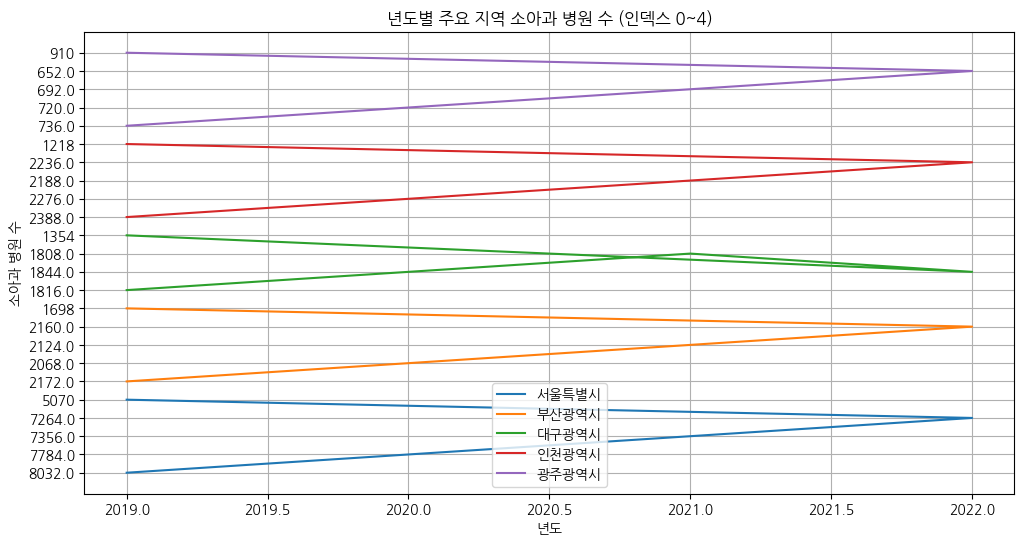

In [ ]:
regional_columns = childDF.columns[3:8]
years = childDF['년도'][:5]  

plt.figure(figsize=(12, 6))
for column in regional_columns:
    plt.plot(years, childDF[column][:5], label=column)

plt.xlabel('년도')
plt.ylabel('소아과 병원 수')
plt.title('년도별 주요 지역 소아과 병원 수')
plt.legend()
plt.grid(True)
plt.show()

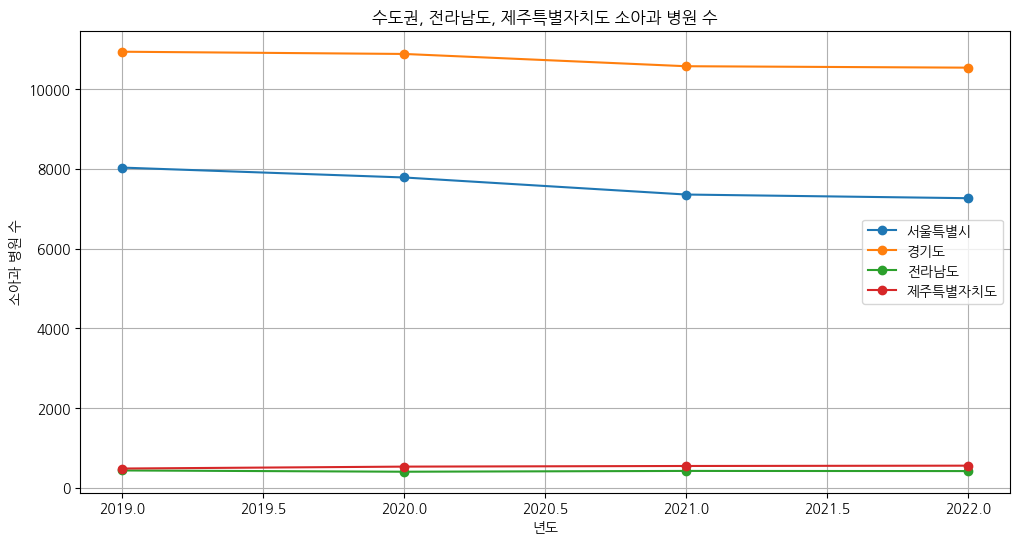

In [41]:
selected_columns = ['서울특별시', '경기도', '전라남도', '제주특별자치도']
years = childDF['년도'][:4]  # Extracting year data for index 0 to 4
plt.figure(figsize=(12, 6))
for column in selected_columns:
    plt.plot(years, childDF[column][:4].astype(float), marker='o', linestyle='-', label=column)
plt.xlabel('년도')
plt.ylabel('소아과 병원 수')
plt.title('수도권, 전라남도, 제주특별자치도 소아과 병원 수')
plt.legend()
plt.grid(True)
plt.show()


<hr>

In [295]:
pee = pd.read_csv(r"C:\Hwan\NABIS\19-22.csv")
pee = pd.DataFrame(pee)
pee

,code,grade,year
0,AA154,188.11,2022
1,AA155,208.86,2019
2,AA156,232.33,2019
3,AA157,255.79,2020
4,AA100,166.59,2019
...,...,...,...
17450,AW002,247.80,2020
17451,AW003,499.12,2020
17452,AH111,27.30,2020
17453,AH112,16.58,2020


<hr>

In [303]:
finalChild = pd.read_csv(r"C:\Hwan\NABIS\수가, 소아과 통합.csv", encoding='cp949')
finalChild

C:\Users\hwans\AppData\Local\Temp\ipykernel_27988\3671682366.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  finalChild = pd.read_csv(r"C:\Hwan\NABIS\수가, 소아과 통합.csv", encoding='cp949')


,Unnamed: 0,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,...,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN,code,grade,year
0,0,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,...,1220,432,1152,1648,480,경기도,전라남도,AA154,188.11,2022
1,1,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,...,1220,432,1152,1648,480,경기도,전라남도,AA155,208.86,2019
2,2,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,...,1220,432,1152,1648,480,경기도,전라남도,AA156,232.33,2019
3,3,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,...,1220,432,1152,1648,480,경기도,전라남도,AA157,255.79,2020
4,4,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,...,1220,432,1152,1648,480,경기도,전라남도,AA100,166.59,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488735,488735,2022,병원 폐업 수,335,74,46,46,26,37,13,...,38,26,24,51,13,서울특별시,제주특별자치도,AW002,247.80,2020
488736,488736,2022,병원 폐업 수,335,74,46,46,26,37,13,...,38,26,24,51,13,서울특별시,제주특별자치도,AW003,499.12,2020
488737,488737,2022,병원 폐업 수,335,74,46,46,26,37,13,...,38,26,24,51,13,서울특별시,제주특별자치도,AH111,27.30,2020
488738,488738,2022,병원 폐업 수,335,74,46,46,26,37,13,...,38,26,24,51,13,서울특별시,제주특별자치도,AH112,16.58,2020


In [305]:
finalChild.drop(columns=["Unnamed: 0"], inplace=True)
finalChild

,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,...,전북특별자치도,전라남도,경상북도,경상남도,제주특별자치도,MAX,MIN,code,grade,year
0,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,1220,432,1152,1648,480,경기도,전라남도,AA154,188.11,2022
1,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,1220,432,1152,1648,480,경기도,전라남도,AA155,208.86,2019
2,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,1220,432,1152,1648,480,경기도,전라남도,AA156,232.33,2019
3,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,1220,432,1152,1648,480,경기도,전라남도,AA157,255.79,2020
4,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,1220,432,1152,1648,480,경기도,전라남도,AA100,166.59,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488735,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,38,26,24,51,13,서울특별시,제주특별자치도,AW002,247.80,2020
488736,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,38,26,24,51,13,서울특별시,제주특별자치도,AW003,499.12,2020
488737,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,38,26,24,51,13,서울특별시,제주특별자치도,AH111,27.30,2020
488738,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,38,26,24,51,13,서울특별시,제주특별자치도,AH112,16.58,2020


In [ ]:
hospee = pd.read_csv(r"C:\Hwan\NABIS\의료수가와 변수(가공데이터).csv")
hospee = pd.DataFrame(hospee)
hospee.drop(index=[2, 3, 4, 5], inplace=True)

,구분,2019,2020,2021,2022
0,"병원, 요양병원, 정신병원 및 종합병원",74.90,76.20,77.30,78.40
1,의원,83.40,85.80,87.60,90.20
6,보건진료소,81.50,83.80,86.10,88.50
7,의료인력(간호사 및 기타 인원),"608,056","672,062","701,373","727,320"
8,"의료인력(의사,약사 등)","245,771","252,694","258,308","264,215"
9,소비자물가지수(보건),98.516,100.00,99.92,100.76
10,GDP,"2,040,594","2,058,467","2,221,913","2,323,782"
11,인플레이션 전망,0.38,0.54,2.50,5.09
12,고령화지수,119.2,129.3,139.4,151.0
13,요양기관현황,"94,865","96,742","98,479","100,396"


In [308]:
hospee.drop(index=[6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
hospee

,구분,2019,2020,2021,2022
0,"병원, 요양병원, 정신병원 및 종합병원",74.90,76.20,77.30,78.40
1,의원,83.40,85.80,87.60,90.20


In [311]:
data = pd.read_csv(r"C:\Hwan\NABIS\수가, 소아과 최종 통합본.csv", encoding='cp949')
data = pd.DataFrame(data)
data.drop(columns=["Unnamed: 0"], inplace=True)
data

C:\Users\hwans\AppData\Local\Temp\ipykernel_27988\331504864.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Hwan\NABIS\수가, 소아과 최종 통합본.csv", encoding='cp949')


,년도,표시과목별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,...,code,grade,2019 병원,2020 병원,2021 병원,2022 병원,2019 의원,2020 의원,2021 의원,2022 의원
0,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,AA154,188.11,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
1,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,AA155,208.86,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
2,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,AA156,232.33,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
3,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,AA157,255.79,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
4,2019,소아과 병원 수,8032,2172,1816,2388,736,1004,580,10940,...,AA100,166.59,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488735,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,AW002,247.80,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
488736,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,AW003,499.12,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
488737,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,AH111,27.30,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2
488738,2022,병원 폐업 수,335,74,46,46,26,37,13,218,...,AH112,16.58,74.9,76.2,77.3,78.4,83.4,85.8,87.6,90.2


- K-MEAN 알고리즘을 쓰려고 했으나 속성의 개수가 많을수록 군집화 정확도가 떨어짐 -> PCA로 차원감소를 적용
- 반복을 수행하는 횟수가 많아질수록 수행 시간이 느려짐
- 몇개의 군집을 선택해야할지 가이드 하기가 어려움
- => DBCAN 알고리즘 사용
- 데이터의 밀도를 기반으로 군집을 찾는 방법, 특정 밀도 이상의 데이터가 있는 곳을 클로스터로 정의
- 클러스터의 수를 알 필요 없고, 비선형 클러스터 형태나 노이즈가 많은 데이터에도 잘 작동 

- 예측 모델 : XGBoost
- 과적합 방지하는 다양한 기법이 있고, 파라미터 조정을 통해 유연하게 사용 가능
- 대규모 데이터와 고차원 데이터에 매우 효과적

In [312]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [313]:
# 지정된 인코딩으로 CSV 파일을 불러옵니다
# file_path = '/mnt/data/수가, 소아과 최종 통합본.csv'
# df = pd.read_csv(file_path, encoding='cp949')

# 군집화를 위해 관련된 특징 선택: 지역별 의료수가 관련 컬럼과 grade
features = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', 
            '울산광역시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', 
            '전라남도', '경상북도', '경상남도', '제주특별자치도', 'grade']

# 관련 컬럼을 숫자형으로 변환 (비숫자 값은 NaN으로 변환됩니다)
for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')

# 결측치를 KNN Imputer를 사용하여 처리합니다
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(data[features]), columns=features)

# DBSCAN 적용 전에 특징을 표준화합니다
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# 최적의 eps 값을 결정하기 위한 k-거리 그래프 작성
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

sorted_distances = np.sort(distances[:, 4])
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Graph to Determine Optimal eps')
plt.grid(True)
plt.show()

# DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

df_imputed['Cluster'] = clusters

df_imputed.to_csv('/mnt/data/dbscan_clustered_results.csv', index=False)


KeyboardInterrupt: 